# Data Exploration and Data Visualization 


In [24]:
#Take the time to complete data exploration on the data including finding standard deviation and variance for numerical features. 
#Remember this should be a continuous feature.
#Complete all data visualizations on the data to learn about the features. 
#Review distribution, skewness, and shape of the features.


In [25]:
#reading the data chart and importing exploration files. Also displaying the first few to understand data
#Features are Age and EstimatedSalary and our target is Purchased
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('social_ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,No
1,35,20000,No
2,26,43000,No
3,27,57000,No
4,19,76000,No


In [38]:
#Standard deviation of Age, Salary 
print('The variance of Age is ' )
df['Age'].std()


The variance of Age is 


10.48287659730792

In [39]:
print('The variance of Salary is ' )
df['EstimatedSalary'].std()

The variance of Salary is 


34096.960282424785

In [40]:
#Mean of Age and Salary
print('The Mean of Age is ' )
df['Age'].mean()

The Mean of Age is 


37.655

In [41]:
print('The Mean of Salary is ' )
df['EstimatedSalary'].mean()

The Mean of Salary is 


69742.5

<Axes: xlabel='Age'>

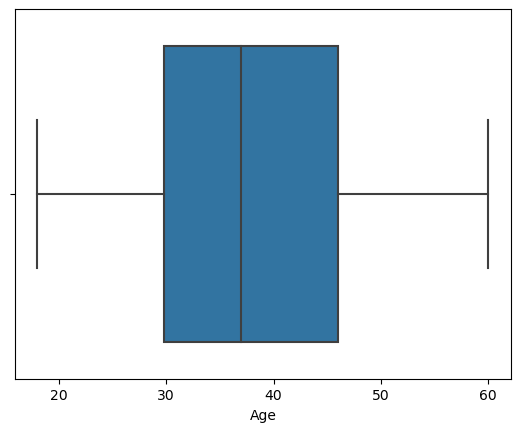

In [42]:
#Visualizing data
sns.boxplot(x = df['Age'])
#Age of customers surfing the web based on the data is skewed 

<Axes: xlabel='EstimatedSalary'>

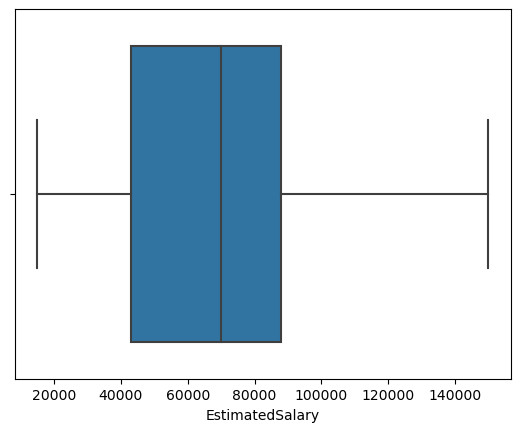

In [43]:
sns.boxplot(x = df['EstimatedSalary'])
#

<Axes: xlabel='Purchased'>

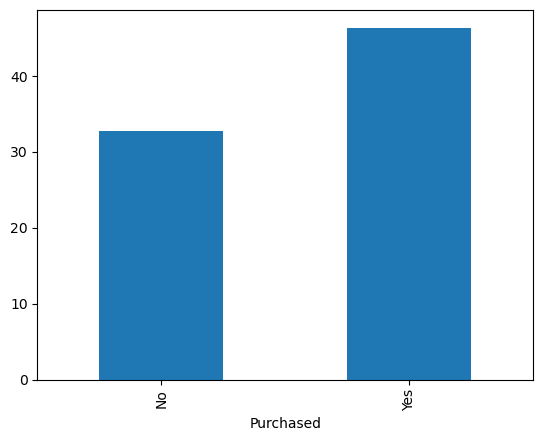

In [46]:
data = df.groupby('Purchased')['Age'].mean()
data.plot.bar()

<Axes: xlabel='Age'>

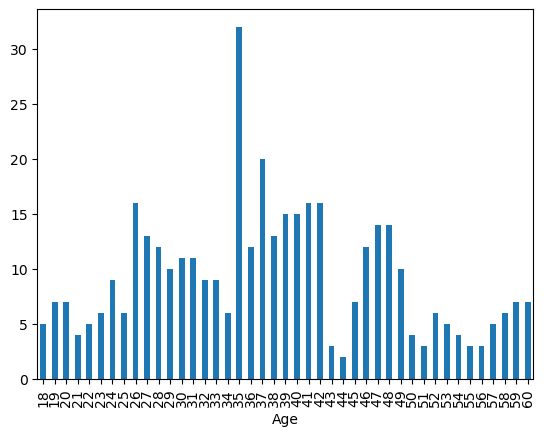

In [49]:
data2 = df.groupby('Age')['EstimatedSalary'].count()
data2.plot.bar()
#Based on Age, Highest salaries lie towards middle aged people around mid 30s

<Axes: xlabel='Purchased'>

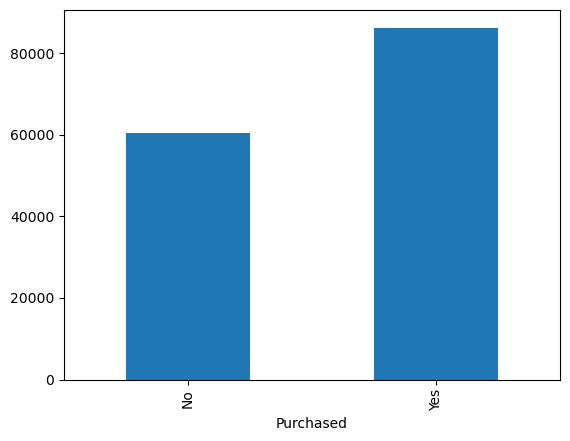

In [50]:
data = df.groupby('Purchased')['EstimatedSalary'].mean()
data.plot.bar()
#higher salaries more likely to purchase after ad

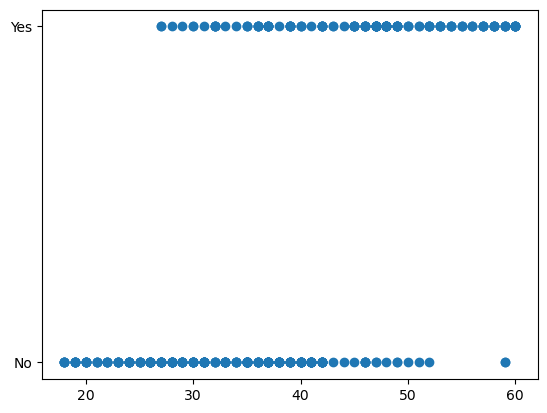

In [51]:
plt.scatter(df['Age'], df['Purchased'])

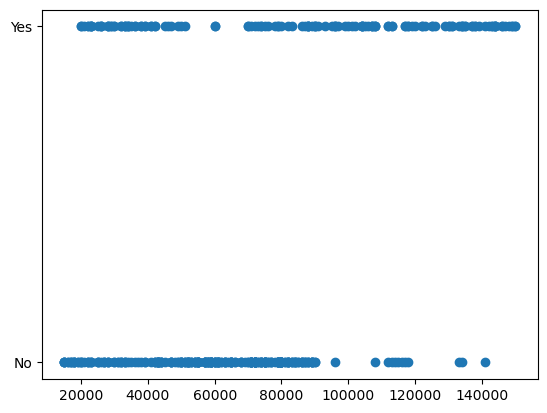

In [53]:
plt.scatter(df['EstimatedSalary'], df['Purchased'])
#Lower Salaries less likely to purchase items after advertisment

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

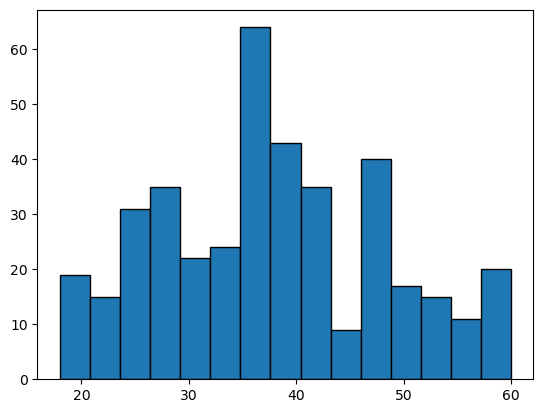

In [57]:
plt.hist(df['Age'], bins=15, edgecolor='black')
df['Age'].describe()
#The distribution of the Age of people online surfing the web for purchases is roughly symmetric with no clear skew, meaning 
#a decent amount of all ages are online buying items.The mean age is 37.55, and the spread of ages ranges from age 18-60.

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

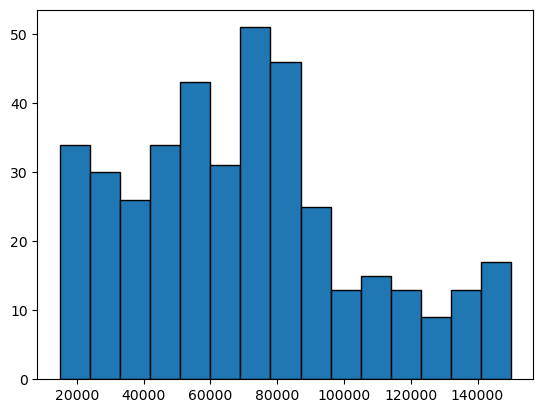

In [58]:
plt.hist(df['EstimatedSalary'], bins=15, edgecolor='black')
df['EstimatedSalary'].describe()
#The distribution of Estimated Salaries of Online buyers is skewed to the right with majority of them having lower incomes.
#The mean of salaries is around 69k and they have a standard deviation of 34k. They range from 15k to 150k

C:\Users\ASC_Student\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


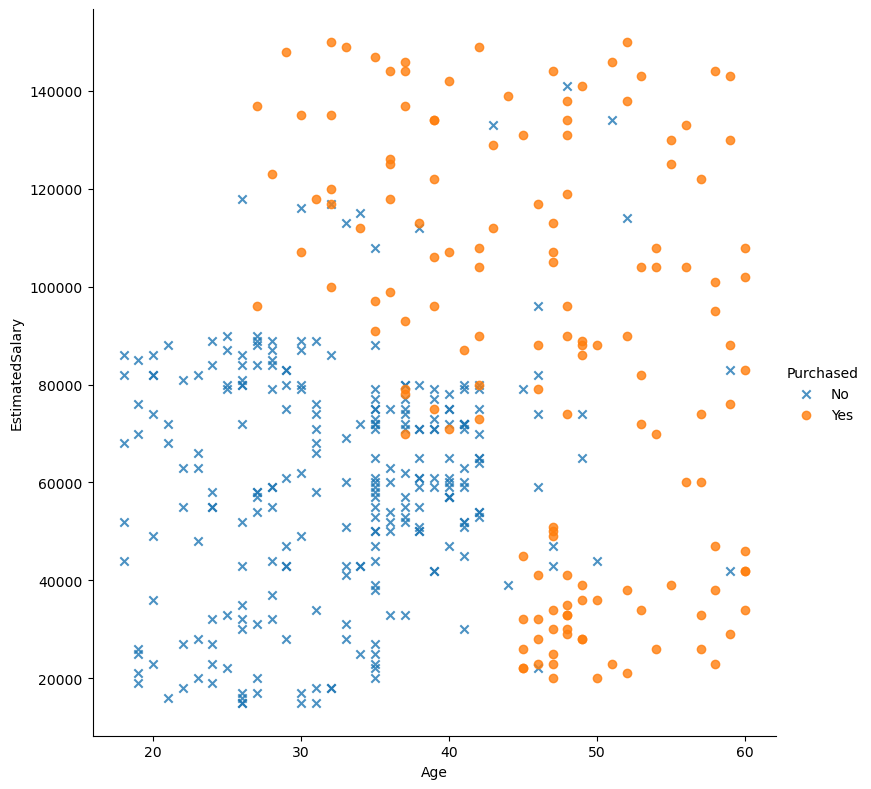

In [74]:
sns.lmplot(x='Age', y='EstimatedSalary',
           data=df,
           hue='Purchased',
           markers=['x', 'o'],
           height=8,
           aspect=1,
           fit_reg=False)


# Data Curation/Feature Engineering

In [ ]:
#outliers
#To Find outliers we must use the IQR*1.5 equation.

In [59]:
#Age
df['Age'].describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

In [60]:
IQR = 46.00 - 29.75
IQR

16.25

In [62]:
#high outlier Age Q3 + (1.5IQR)
highThresholdA= 46 + (1.5*IQR)
highThresholdA

70.375

In [ ]:
#Anything over 70 in age is an outlier. Currently no data has been collected for anyone over 70.

In [64]:
#Low outlier Age Q1 - (1.5IQR)
LowThresholdA = 29.75 - (1.5*IQR)
LowThresholdA

5.375

In [ ]:
#Anything lower than age 5 is an outlier. There is no data collected for anyone younger than 5. NO outliers for age


In [65]:
#High outliers for Salary
df['EstimatedSalary'].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

In [68]:
#Q3 + (1.5IQR)
IQRS = 88000 - 43000
HighThresholdS = 88000 + (1.5*IQRS)
HighThresholdS

155500.0

In [ ]:
#Any Salary higher than 155500 is an outlier. MAx salary is 150k. No high outliers

In [69]:
#Q1-(1.5IQR)
LowThresholdS = 43000 - (1.5*IQRS)
LowThresholdS

-24500.0

In [ ]:
#ANy salary lower than -24500 is a low outlier. This isnt possible because its negative.
#Therefore, no outliers for estimated salary in collected data

In [71]:
#No null values at all
df = df.dropna()
df

,Age,EstimatedSalary,Purchased
0,19,19000,No
1,35,20000,No
2,26,43000,No
3,27,57000,No
4,19,76000,No
...,...,...,...
395,46,41000,Yes
396,51,23000,Yes
397,50,20000,Yes
398,36,33000,No


In [73]:
#DUMMY VARIABLE
# Display original DataFrame
print("Original DataFrame:")
print(df)

# Convert Purchased column to dummy variables
df_dummies = pd.get_dummies(df, columns=['Purchased'], drop_first=True)

# Ensure dummy variables are integers (ran into issue where it displayed booleans)
df_dummies['Purchased_Yes'] = df_dummies['Purchased_Yes'].astype(int)

# Display DataFrame with dummy variables
print("DataFrame with Dummy Variables")
print(df_dummies)


#Purchased = 1 , No Purchase = 0.
#This is necessary so we can determine how age and salary can effect the likelihood of an online buyer making a purchase
#after seeing an ad. 

Original DataFrame:
     Age  EstimatedSalary Purchased
0     19            19000        No
1     35            20000        No
2     26            43000        No
3     27            57000        No
4     19            76000        No
..   ...              ...       ...
395   46            41000       Yes
396   51            23000       Yes
397   50            20000       Yes
398   36            33000        No
399   49            36000       Yes

[400 rows x 3 columns]
DataFrame with Dummy Variables
     Age  EstimatedSalary  Purchased_Yes
0     19            19000              0
1     35            20000              0
2     26            43000              0
3     27            57000              0
4     19            76000              0
..   ...              ...            ...
395   46            41000              1
396   51            23000              1
397   50            20000              1
398   36            33000              0
399   49            36000              1



# Machine Learning Model - Supervised Learning

In [76]:
theData = df_dummies
theData.head()

,Age,EstimatedSalary,Purchased_Yes
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Choosing Logistic Model


In [91]:
# Define features and target
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [92]:
#Ensuring data looks as supposed to
X.head()


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [93]:
##Ensuring data looks as supposed to
y.head()

0    No
1    No
2    No
3    No
4    No
Name: Purchased, dtype: object

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [96]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [98]:
y_pred = model.predict(X_test)
y_pred

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No'], dtype=object)

In [99]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)



Accuracy: 0.725
Confusion Matrix:
[[58  0]
 [22  0]]
Classification Report:
              precision    recall  f1-score   support

          No       0.72      1.00      0.84        58
         Yes       0.00      0.00      0.00        22

    accuracy                           0.73        80
   macro avg       0.36      0.50      0.42        80
weighted avg       0.53      0.72      0.61        80



C:\Users\ASC_Student\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASC_Student\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASC_Student\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.725: This means that the model is correct 72.5% of the time. However, accuracy alone can be misleading, especially with imbalanced datasets.

True Negatives (TN) [58, 0]: The model correctly identified 58 instances where the purchase was "No".
False Positives (FP) [0, 0]: The model did not incorrectly predict any "No" as "Yes".
False Negatives (FN) [22, 0]: The model failed to identify 22 instances where the purchase was "Yes".
True Positives (TP) [0, 0]: The model did not correctly identify any "Yes" instances.



Precision
No (0.72): When the model predicts "No", it is correct 72% of the time.
Yes (0.00): When the model predicts "Yes", it is never correct.

Recall
No (1.00): The model identifies all the actual "No" instances correctly.
Yes (0.00): The model fails to identify any of the actual "Yes" instances.

Imbalance in Classes: The model performs well on the majority class ("No") but fails to predict the minority class ("Yes"). This indicates a class imbalance problem.

Zero Precision, Recall, and F1-Score for "Yes": The model did not predict any "Yes" correctly. This is a serious issue and means that the model is not able to learn the characteristics of the "Yes" class at all.

Possible Solutions:Add more relevant features that might help the model distinguish between "Yes" and "No" classes.